In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as plt

In [2]:
from google.colab import files
upload = files.upload()

Saving amazon.csv to amazon.csv


In [3]:
df = pd.read_csv('amazon.csv',encoding="ISO-8859-1")

In [4]:
df.head(5)

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [5]:
df.tail(5)

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


In [6]:
df.shape

(6454, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6454 non-null   int64  
 1   state   6454 non-null   object 
 2   month   6454 non-null   object 
 3   number  6454 non-null   float64
 4   date    6454 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


In [8]:
df.describe(include='all')

,year,state,month,number,date
count,6454.000000,6454,6454,6454.000000,6454
unique,NaN,23,12,NaN,20
top,NaN,Rio,Janeiro,NaN,1998-01-01
freq,NaN,717,541,NaN,324
mean,2007.461729,NaN,NaN,108.293163,NaN
std,5.746654,NaN,NaN,190.812242,NaN
min,1998.000000,NaN,NaN,0.000000,NaN
25%,2002.000000,NaN,NaN,3.000000,NaN
50%,2007.000000,NaN,NaN,24.000000,NaN
75%,2012.000000,NaN,NaN,113.000000,NaN


In [9]:
#Checking null values in dataset
df.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [10]:
df.duplicated().sum(
)

32

In [11]:
df = df.drop_duplicates()

In [12]:
df.shape

(6422, 5)

In [13]:
df['month'].unique(
)

array(['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho',
       'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
      dtype=object)

In [19]:
df['new_month']=df['month'].map({'Janeiro':'Jan',
                 'Fevereiro':'Feb',
                 'Março': 'March',
                 'Abril':'April',
                 'Maio':'May',
                 'Junho':'June',
                 'Julho':'July',
                 'Agosto':'Agu',
                 'Setembro': 'Sep',
                 'Outubro':'Oct',
                 'Novembro':'Nov',
                 'Dezembro':'Dec'})

In [15]:
#Total number of fires registered
df.columns

Index(['year', 'state', 'month', 'number', 'date'], dtype='object')

In [16]:
df['number'].sum()

698811.073

In [26]:
df1= df.groupby('new_month')['number'].sum().sort_values(ascending=False).reset_index()

In [27]:
df1

,new_month,number
0,July,92319.113
1,Oct,88681.579
2,Agu,88050.435
3,Nov,85508.054
4,Sep,58578.305
5,Dec,57535.480
6,June,55997.675
7,Jan,47681.844
8,May,34725.363
9,Feb,30839.050


<Axes: xlabel='new_month', ylabel='number'>

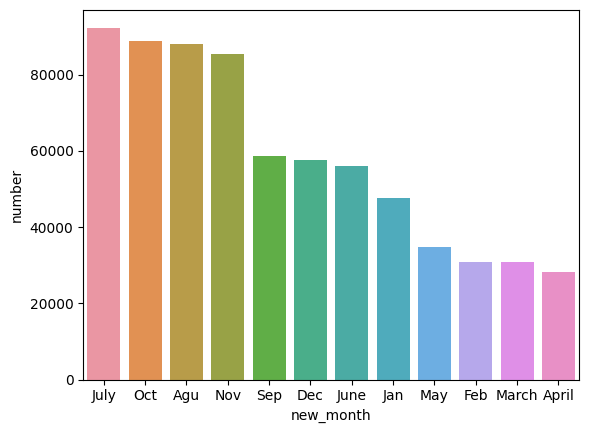

In [28]:
sns.barplot(data=df1, x='new_month',y='number')

In [34]:
#In which Year maximum number of forest fires were Reported?
df2= df.groupby('year')['number'].sum().reset_index()
df2

,year,number
0,1998,20013.971
1,1999,26882.821
2,2000,27351.251
3,2001,29054.612
4,2002,37390.600
5,2003,42760.674
6,2004,38450.163
7,2005,35004.965
8,2006,33824.161
9,2007,33028.413


<Axes: xlabel='year', ylabel='number'>

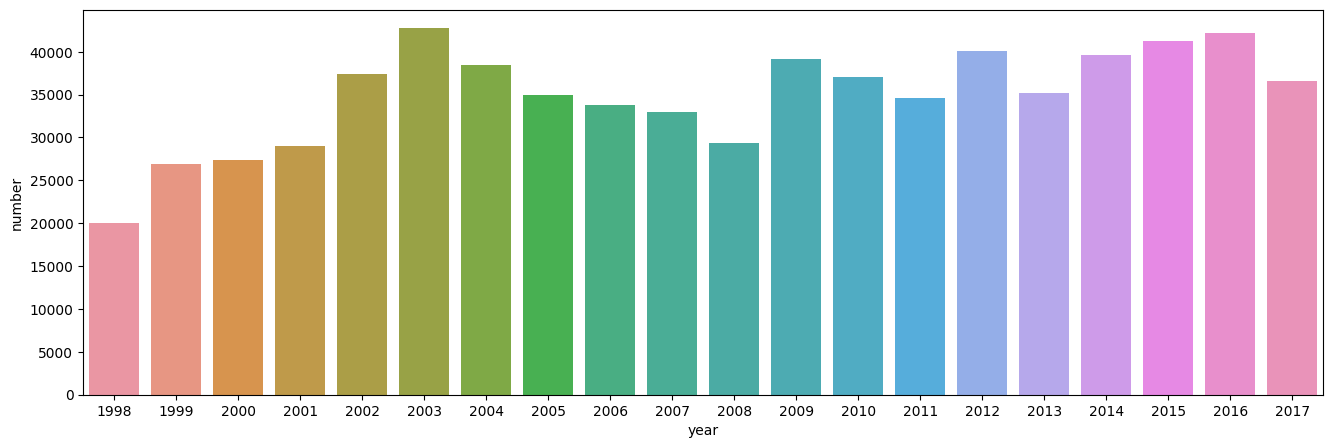

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,5))
sns.barplot(data=df2,x='year',y='number')

In [38]:
#In which State Maximum number of forest fires where reported
df.columns

Index(['year', 'state', 'month', 'number', 'date', 'new_month'], dtype='object')

In [42]:
len(df['state'].unique())

23

In [43]:
df3=df.groupby('state')['number'].sum().sort_values().reset_index()

In [44]:
df3

,state,number
0,Sergipe,3237.000
1,Distrito Federal,3561.000
2,Alagoas,4606.000
3,Espirito Santo,6546.000
4,Acre,18464.030
5,Rondonia,20285.429
6,Amapa,21831.576
7,Santa Catarina,24359.852
8,Roraima,24385.074
9,Pernambuco,24498.000


<Axes: xlabel='state', ylabel='number'>

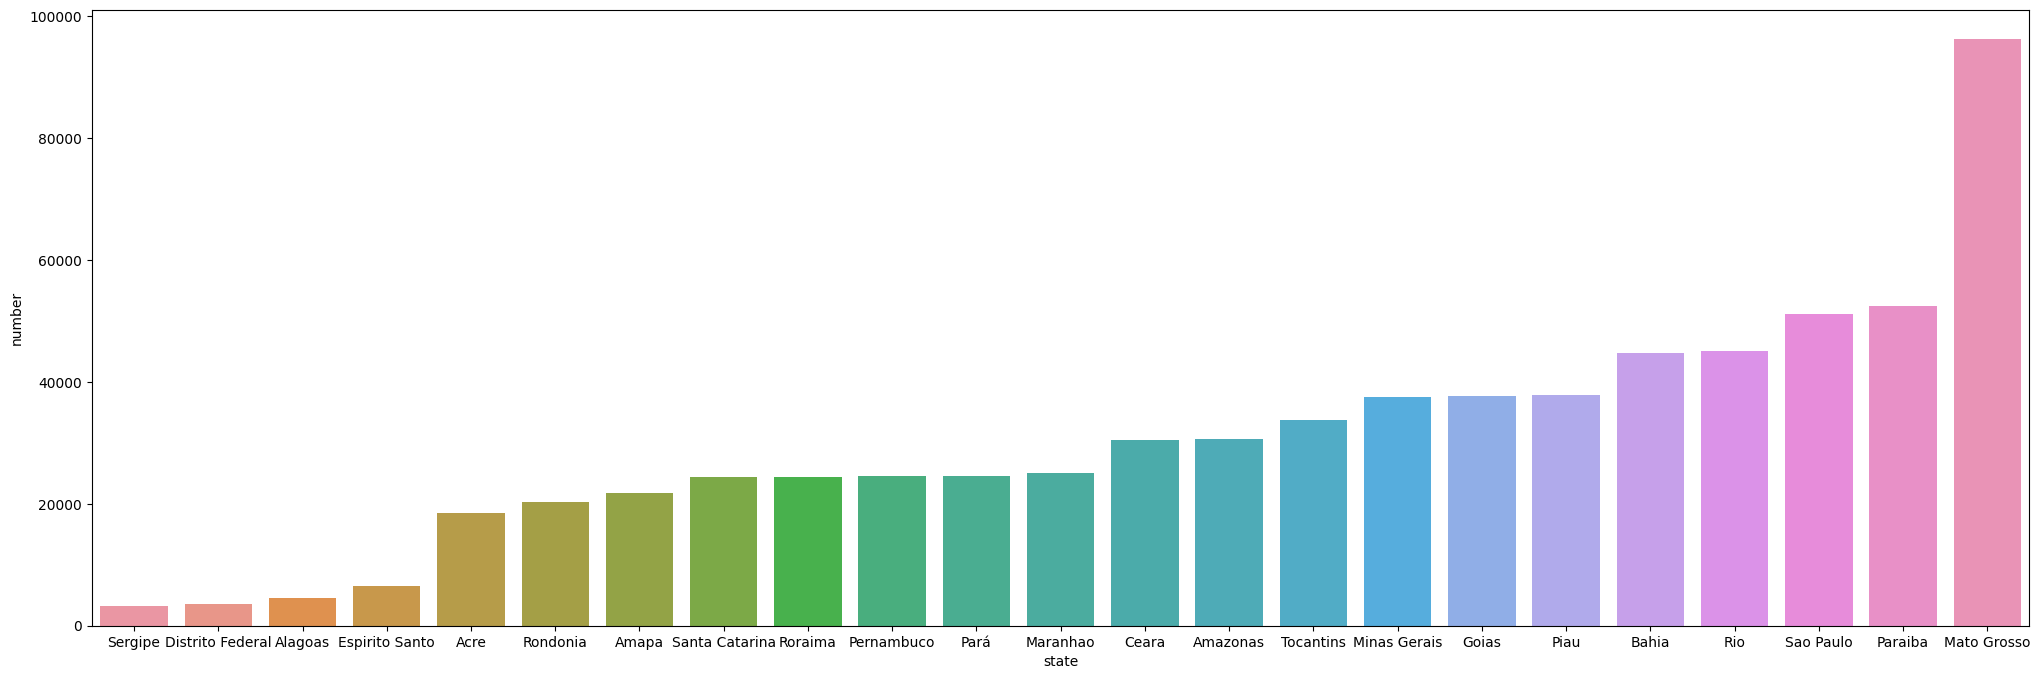

In [48]:
plt.figure(figsize=(25,8))
sns.barplot(data=df3,x='state',y='number')

In [57]:
#find total number of fires were reported in amzaon
df[df['state']=='Amazonas']['number'].sum()

30650.129

In [60]:
#nukber of fores reported in amazon year wise
df4=df[df['state']=='Amazonas']
df4.groupby('year')['number'].sum().reset_index()

,year,number
0,1998,946.000
1,1999,1061.000
2,2000,853.000
3,2001,1297.000
4,2002,2852.000
5,2003,1524.268
6,2004,2298.207
7,2005,1657.128
8,2006,997.640
9,2007,589.601


<Axes: xlabel='year', ylabel='number'>

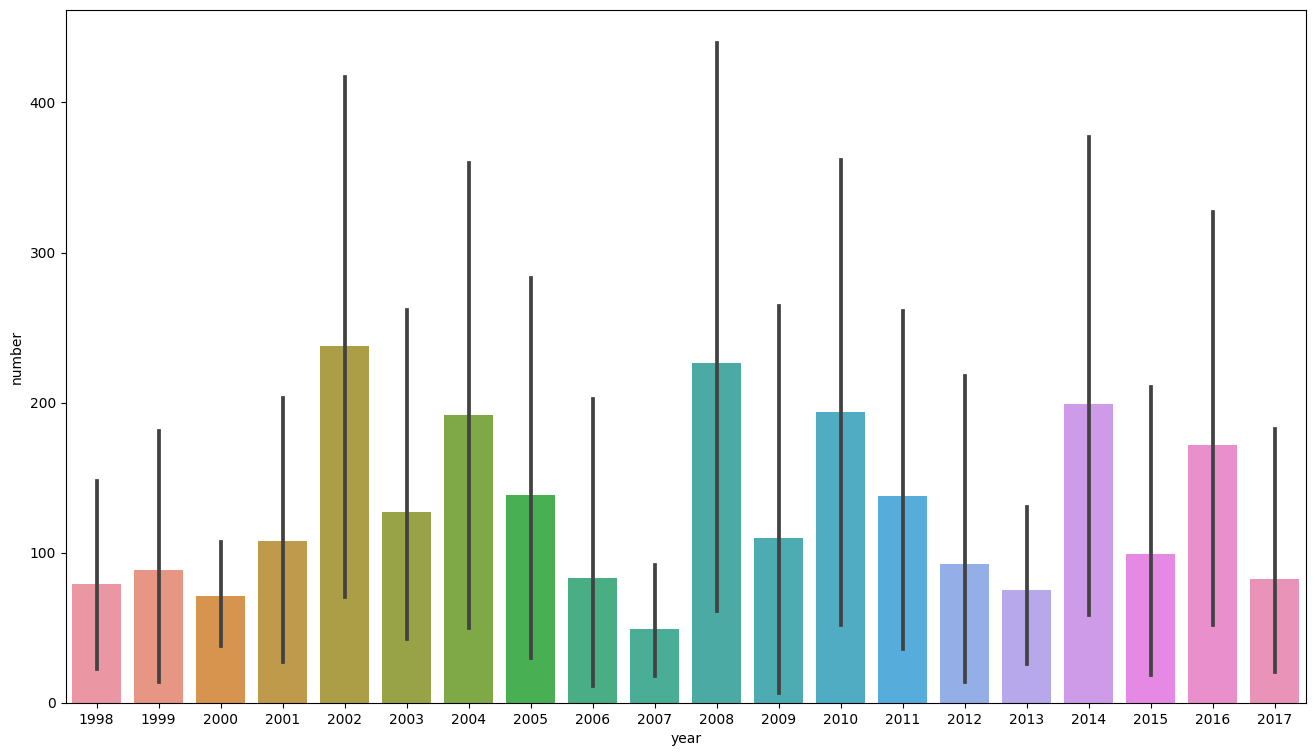

In [63]:
plt.figure(figsize=(16,9))
sns.barplot(data=df4,x='year',y='number')

In [62]:
#report number of fires reportedin amazon day wise
df.head(2)

,year,state,month,number,date,new_month
0,1998,Acre,Janeiro,0.0,1998-01-01,Jan
1,1999,Acre,Janeiro,0.0,1999-01-01,Jan


In [64]:
df4.groupby('date')['number'].sum()

date
1998-01-01     946.000
1999-01-01    1061.000
2000-01-01     853.000
2001-01-01    1297.000
2002-01-01    2852.000
2003-01-01    1524.268
2004-01-01    2298.207
2005-01-01    1657.128
2006-01-01     997.640
2007-01-01     589.601
2008-01-01    2717.000
2009-01-01    1320.601
2010-01-01    2324.508
2011-01-01    1652.538
2012-01-01    1110.641
2013-01-01     905.217
2014-01-01    2385.909
2015-01-01    1189.994
2016-01-01    2060.972
2017-01-01     906.905
Name: number, dtype: float64

In [65]:
dt6= df[df['state']=='Amazonas']

In [66]:
dt6

,year,state,month,number,date,new_month
718,1998,Amazonas,Janeiro,0.0,1998-01-01,Jan
719,1999,Amazonas,Janeiro,3.0,1999-01-01,Jan
720,2000,Amazonas,Janeiro,7.0,2000-01-01,Jan
721,2001,Amazonas,Janeiro,3.0,2001-01-01,Jan
722,2002,Amazonas,Janeiro,17.0,2002-01-01,Jan
...,...,...,...,...,...,...
952,2012,Amazonas,Dezembro,80.0,2012-01-01,Dec
953,2013,Amazonas,Dezembro,236.0,2013-01-01,Dec
954,2014,Amazonas,Dezembro,293.0,2014-01-01,Dec
955,2015,Amazonas,Dezembro,565.0,2015-01-01,Dec


In [69]:
day=dt6.groupby(dt6['date'].dt.dayofweek).sum().number
import calendar
day.index = [calendar.day_name[x] for x in range(0,7)]
day

AttributeError: ignored

In [86]:
#find the state names where fires were Reported in 'Dec'
df[df['new_month']=='dec']['state']

Series([], Name: state, dtype: object)

In [72]:
#Find Totak number of fires were reported in 2015
df7 = df[df['year']==2015].groupby('new_month')['number'].sum().reset_index(

)

Text(0.5, 1.0, 'No of Fires in 2015 Month-wise')

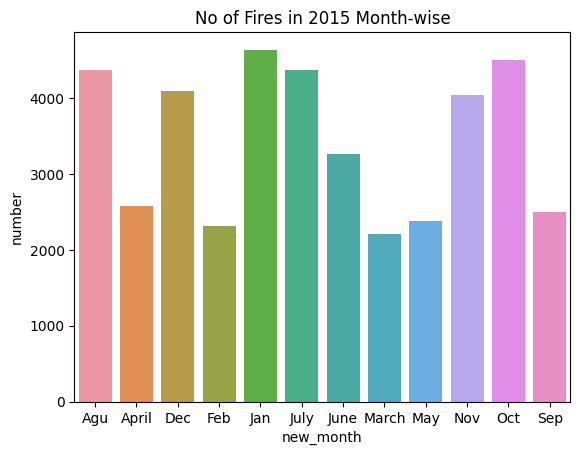

In [74]:
sns.barplot(data=df7,x='new_month',y='number')
plt.title('No of Fires in 2015 Month-wise'
)

In [79]:
#find Average no if fores were Reported from highest to lowest(statewise
df8=df.groupby('state')['number'].mean().sort_values(ascending=False).reset_index()

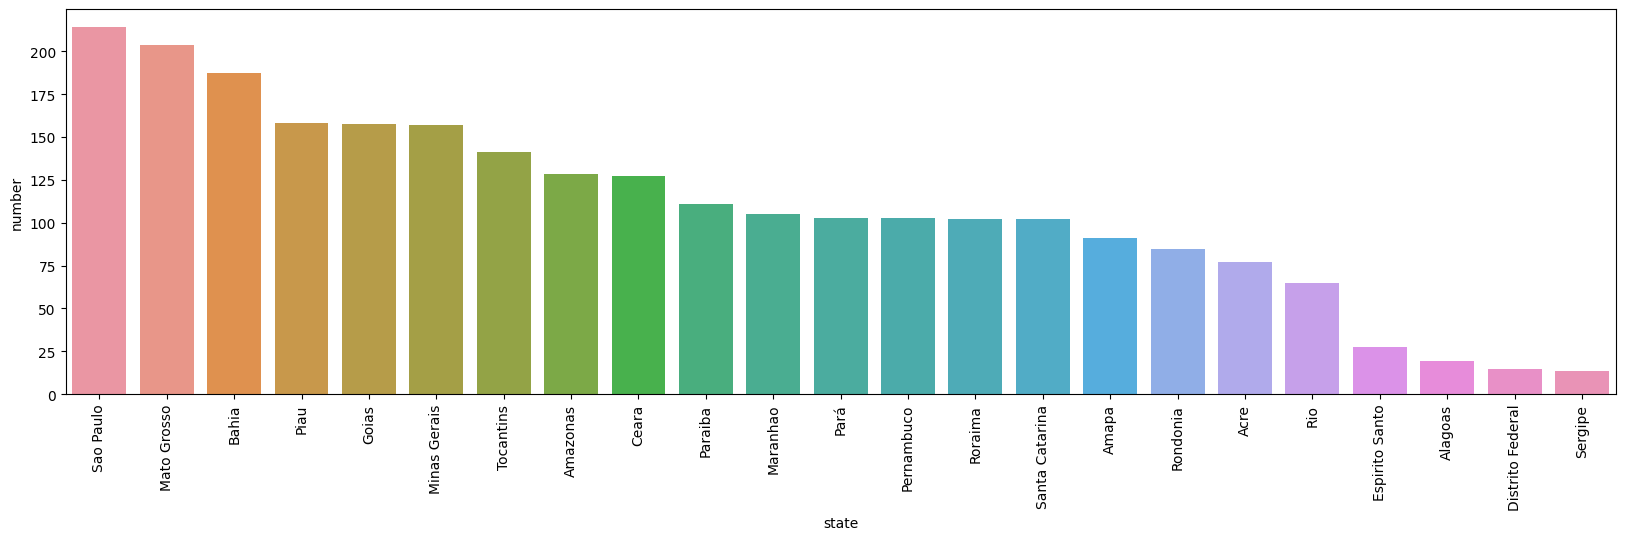

In [84]:
plt.figure(figsize=(20,5))
sns.barplot(data=df8,x='state',y='number')
plt.xticks(rotation=90)
plt.show()